In [1]:
import tensorflow as tf
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

import sys
sys.path += ['../src']
import data_process
import models
import training
import visualization

## Loading and Processing Data ##

In [2]:
# Data for MLP model
(x_train_mlp, y_train),(x_test_mlp, y_test) = data_process.data_process_pipeline('cifar', 'mlp')

# Data for CNN model
(x_train_cnn, y_train),(x_test_cnn, y_test) = data_process.data_process_pipeline('cifar', 'cnn')

Processing cifar for mlp model...
Step 1: Downloading cifar dataset
Step 2: Normalizing data
Step 3: Applying PCA
Data is ready to run the notebook
Processing cifar for cnn model...
Step 1: Downloading cifar dataset
Step 2: Normalizing data
Data is ready to run the notebook


## 1 - MLP Many Layers Regime ##

### 1.1 - Deep vs. Shallow Comparison (20 hidden vs 1 hidden)

Configuration:

* **Deep FFNN:** to check that the many layers is indipendent of how large the parameters are.
     
  * (20, 8) --> Many-Layers Regime
  * (1, 8) --> Non Many-Layers Regime


* **Activation Functions:** $tanh$


* **Initialization:** $N(\omega, \mu = 0, \sigma^2 = 0.05)$ --> Not-Large Parameters Regime 



* **Loss:** Sparse Categorical Cross-Entropy


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Many Layers Regime.


Comparing to see if the Many_layers Regime makes it more difficult to train the model. In fact, it does. The Learning Algorithm is completely stuck and is not able to advance in learning. Indeed, the mean gradient goes to zero really fast, after 1 epoch, in almost all layers, and the standard deviation is really small for all layers beyond the last two, meaning that almost all gradients in deep layers are practically zero.



In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_MLPnet(input_shape=input_shape,
                 activation = 'tanh',
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,0.05,seed=1),
                  #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer',
                  n_hidden=20, 
                  units = 8,
                  regularization_type='l2', 
                  regularization_value=r)

grad_history, loss_history, accuracy_history, val_loss_history, val_accuracy_history, time = training.train_model(x_train_mlp, y_train, x_test_mlp, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model2 = models.make_MLPnet(input_shape=input_shape, activation = 'tanh',
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,0.05,seed=1),
#                   initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer', 
                  n_hidden=1, 
                  units =8,
                  regularization_type='l2', 
                  regularization_value=r)

grad_history2, loss_history2, accuracy_history2, val_loss_history2, val_accuracy_history2, time2 = training.train_model(x_train_mlp, y_train, x_test_mlp, y_test,  model2, epochs, optimizer, loss, metric, batch_size)

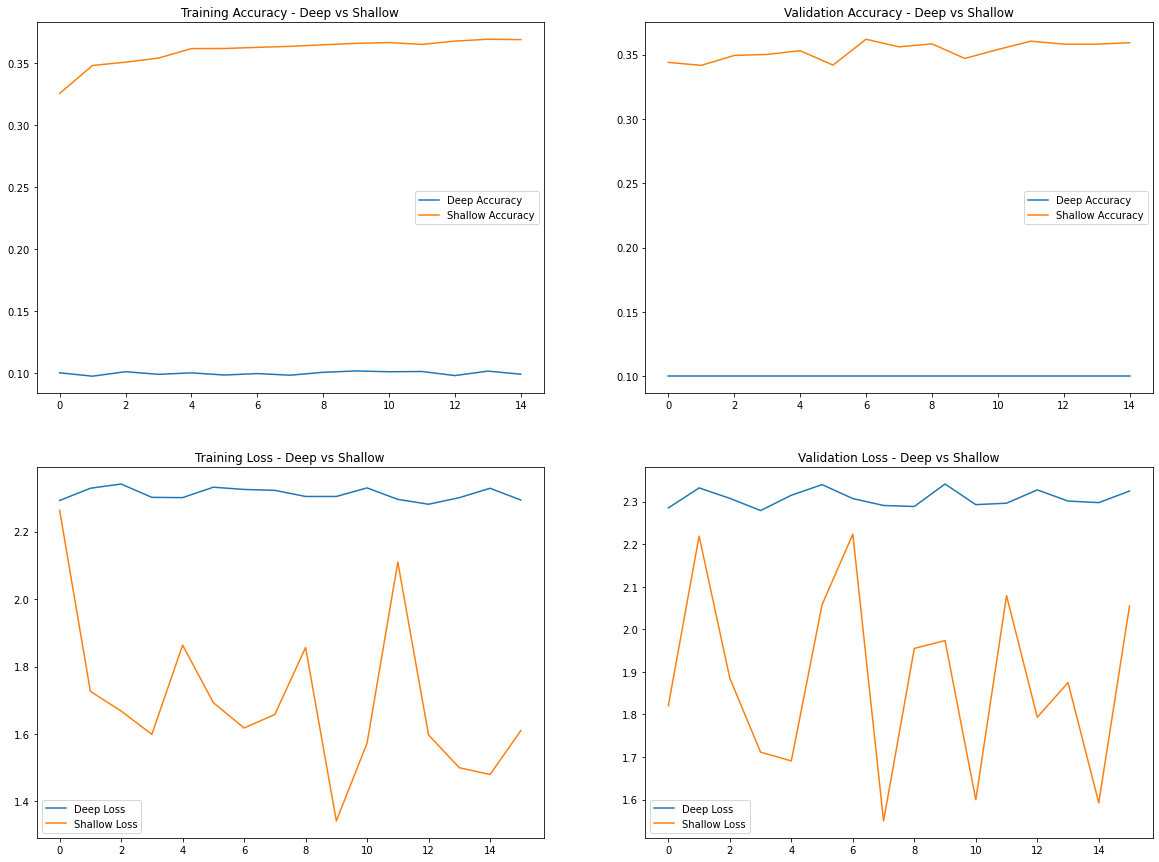

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Deep vs Shallow")
ax[0,0].plot(np.arange(len(accuracy_history)), accuracy_history, label='Deep Accuracy')
ax[0,0].plot(np.arange(len(accuracy_history)), accuracy_history2, label='Shallow Accuracy')  
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Deep vs Shallow")
ax[0,1].plot(np.arange(len(val_accuracy_history)), val_accuracy_history, label='Deep Accuracy')
ax[0,1].plot(np.arange(len(val_accuracy_history)), val_accuracy_history2, label='Shallow Accuracy')  
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Deep vs Shallow")
ax[1,0].plot(np.arange(len(loss_history)), loss_history, label='Deep Loss')
ax[1,0].plot(np.arange(len(loss_history)), loss_history2, label='Shallow Loss')  
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Deep vs Shallow")
ax[1,1].plot(np.arange(len(val_loss_history)), val_loss_history, label='Deep Loss')
ax[1,1].plot(np.arange(len(val_loss_history)), val_loss_history2, label='Shallow Loss')  
ax[1,1].legend()

plt.show()

/home/alboz/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alboz/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alboz/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

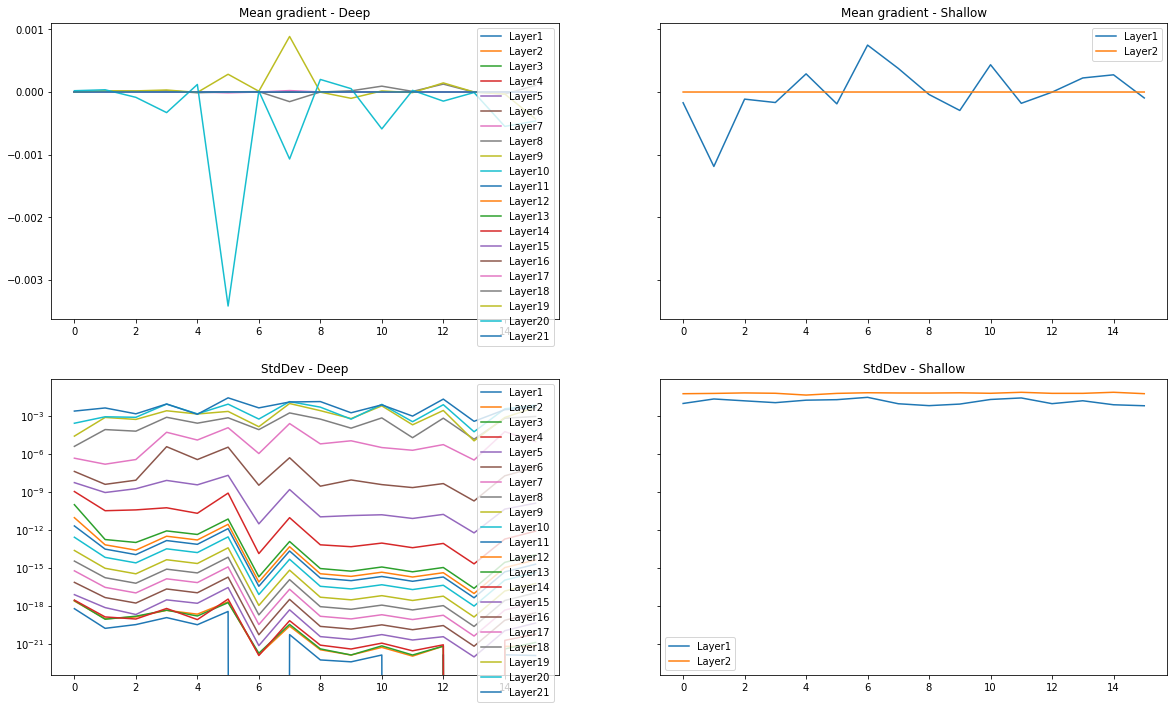

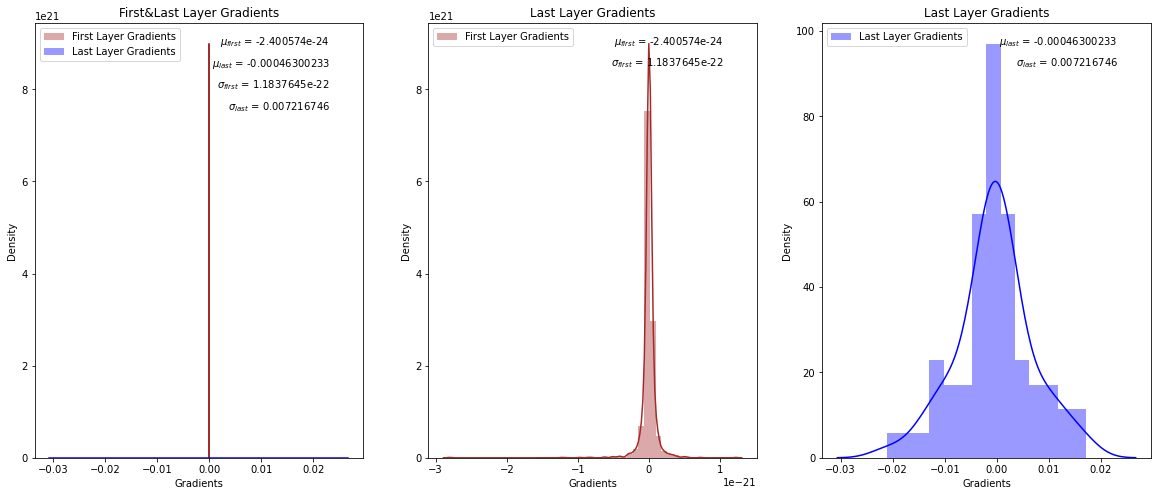

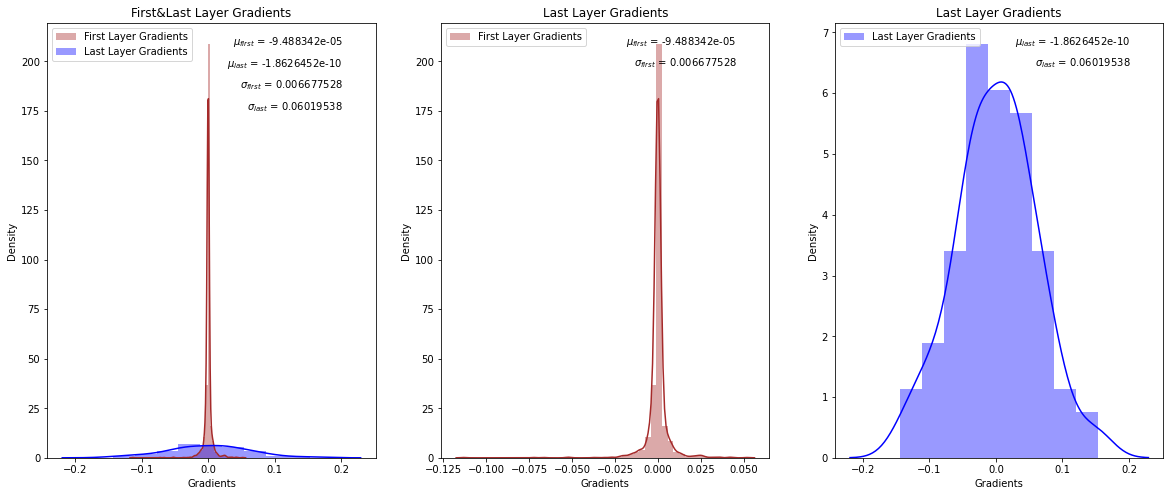

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey = "row")
    
ax[0,0].set_title("Mean gradient - Deep")
for key in grad_history[0]:
    ax[0,0].plot(range(len(grad_history)), [w[key].mean() for w in grad_history], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Deep")
for key in grad_history[0]:
    ax[1,0].semilogy(range(len(grad_history)), [w[key].std() for w in grad_history], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - Shallow")
for key in grad_history2[0]:
    ax[0,1].plot(range(len(grad_history2)), [w[key].mean() for w in grad_history2], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - Shallow")
for key in grad_history2[0]:
    ax[1,1].semilogy(range(len(grad_history2)), [w[key].std() for w in grad_history2], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(grad_history, deep=True)
visualization.plot_gradient_first_last(grad_history2)

### 1.2 - Adding the Scaled Activation Function

Configuration:

* **Shallow FFNN:** to check that the large parameters is indipendent of how many layers the network has. 


* **Activation Functions:** $\alpha \tanh(z/\alpha)$


* **Initialization:** 

    * $N(\omega, \mu = 0, \sigma^2 = 0.05)$ --> Large Parameters Regime


* **Loss:** Sparse Categorical Cross-Entropy


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Large Parameters Regime.

* **Regularization:** NULL

**Results:** rescaling the activation function with the factor $\alpha$ does not add any benefit to the Many-Layer regime's performance. They perform exactly the same way. 





In [ ]:
# Model input shape
input_shape = (32, 32, 3)

def scaled_tanh(x, alpha):
    tanh = tf.keras.activations.tanh(x/alpha)
    return alpha*tanh

#Hyperparameters
epochs = 15
r = 0.0
alpha = 2
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()
scaled_activation = lambda x: scaled_tanh(x, alpha=alpha)


model = models.make_MLPnet(input_shape=input_shape, activation = scaled_activation,
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,0.05,seed=1),
                  #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer', 
                  n_hidden=20, 
                  units = 8,
                  regularization_type='l2', 
                  regularization_value=r)

grad_history3, loss_history3, accuracy_history3, val_loss_history3, val_accuracy_history3, time3 = training.train_model(x_train_mlp, y_train, x_test_mlp, y_test,  model, epochs, optimizer, loss, metric, batch_size)

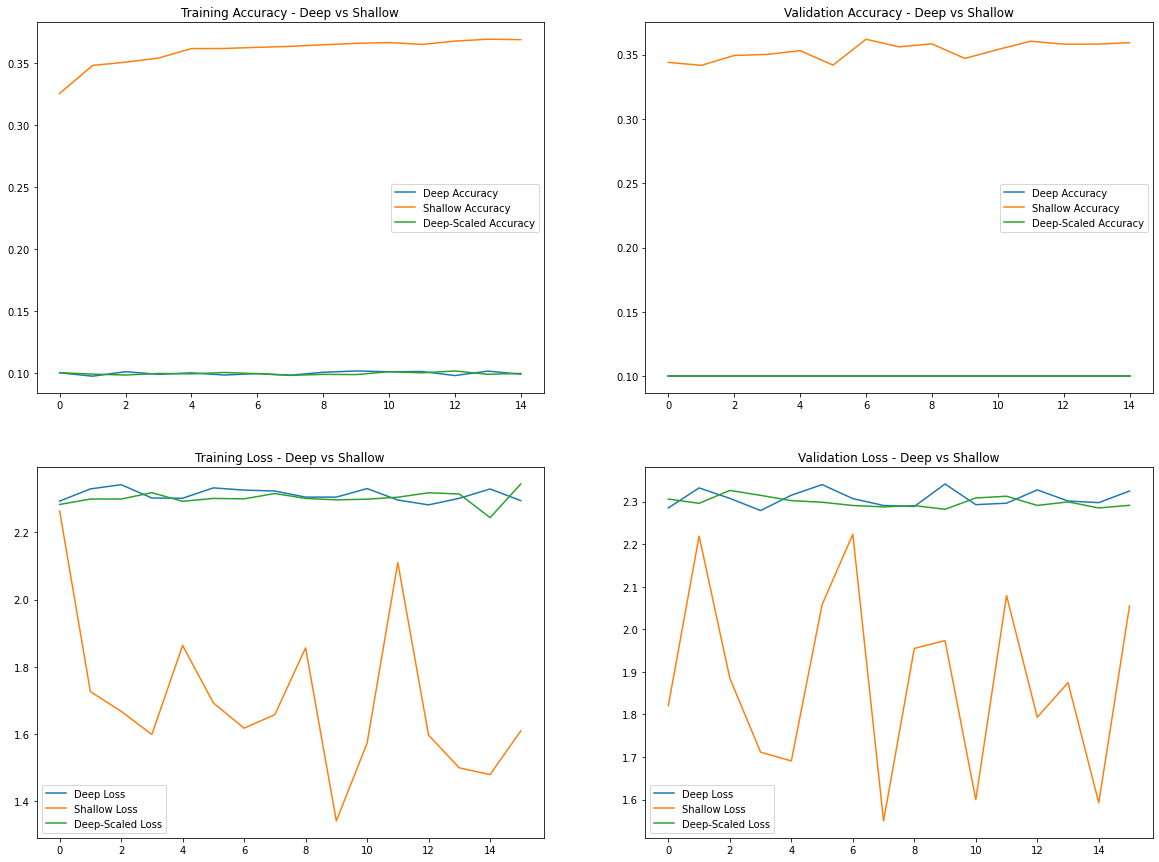

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Deep vs Shallow")
ax[0,0].plot(np.arange(len(accuracy_history)), accuracy_history, label='Deep Accuracy')
ax[0,0].plot(np.arange(len(accuracy_history)), accuracy_history2, label='Shallow Accuracy')
ax[0,0].plot(np.arange(len(accuracy_history3)), accuracy_history3, label='Deep-Scaled Accuracy') 
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Deep vs Shallow")
ax[0,1].plot(np.arange(len(val_accuracy_history)), val_accuracy_history, label='Deep Accuracy')
ax[0,1].plot(np.arange(len(val_accuracy_history)), val_accuracy_history2, label='Shallow Accuracy')  
ax[0,1].plot(np.arange(len(val_accuracy_history3)), val_accuracy_history3, label='Deep-Scaled Accuracy')
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Deep vs Shallow")
ax[1,0].plot(np.arange(len(loss_history)), loss_history, label='Deep Loss')
ax[1,0].plot(np.arange(len(loss_history2)), loss_history2, label='Shallow Loss')  
ax[1,0].plot(np.arange(len(loss_history3)), loss_history3, label='Deep-Scaled Loss')
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Deep vs Shallow")
ax[1,1].plot(np.arange(len(val_loss_history)), val_loss_history, label='Deep Loss')
ax[1,1].plot(np.arange(len(val_loss_history)), val_loss_history2, label='Shallow Loss')  
ax[1,1].plot(np.arange(len(val_loss_history3)), val_loss_history3, label='Deep-Scaled Loss')
ax[1,1].legend()

plt.show()

/home/alboz/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alboz/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alboz/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

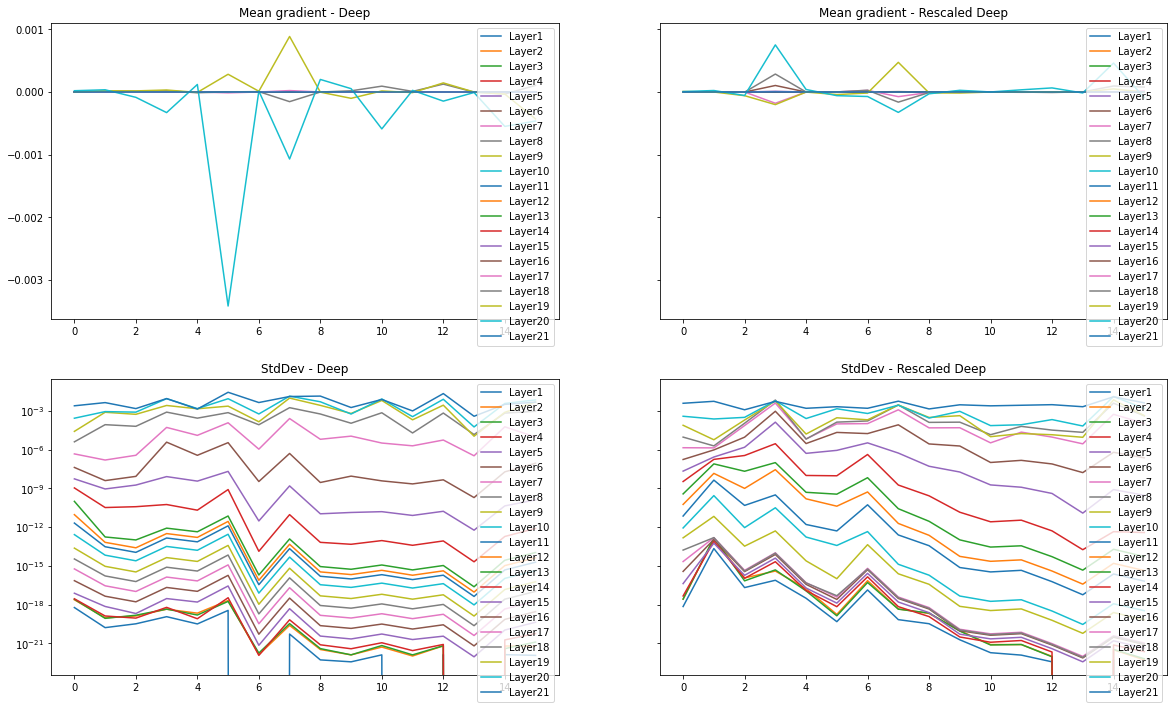

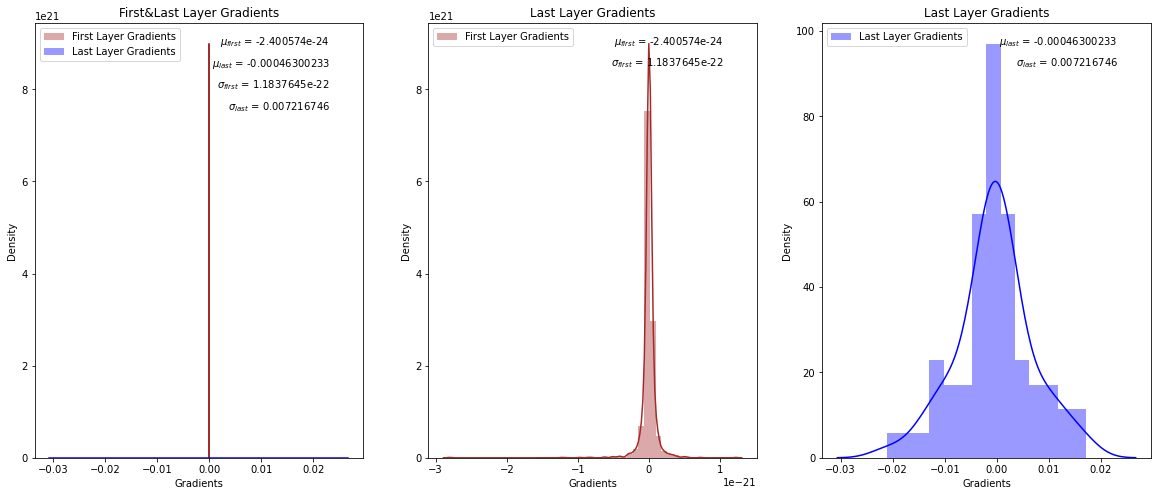

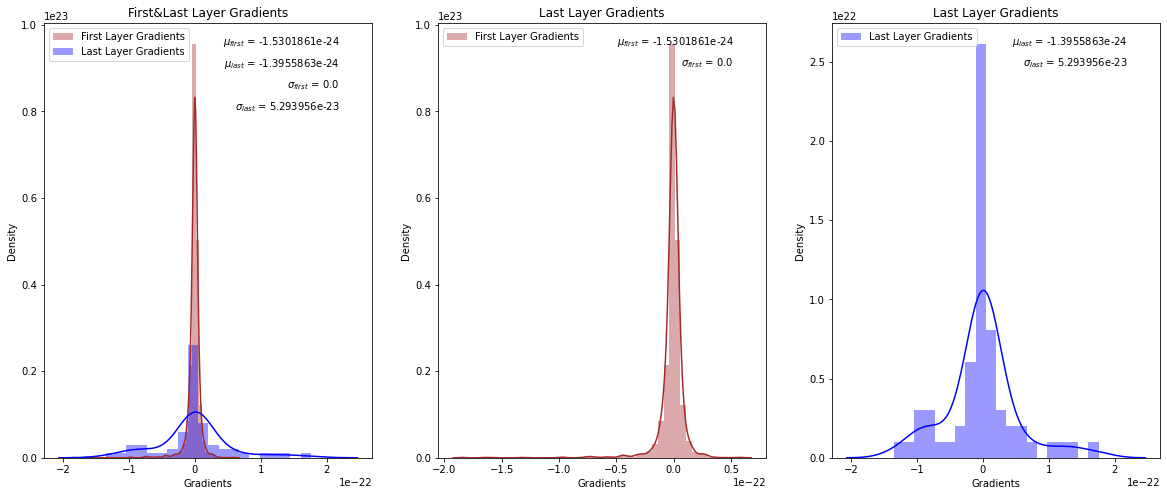

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey = "row")
    
ax[0,0].set_title("Mean gradient - Deep")
for key in grad_history[0]:
    ax[0,0].plot(range(len(grad_history)), [w[key].mean() for w in grad_history], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Deep")
for key in grad_history[0]:
    ax[1,0].semilogy(range(len(grad_history)), [w[key].std() for w in grad_history], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - Rescaled Deep")
for key in grad_history3[0]:
    ax[0,1].plot(range(len(grad_history3)), [w[key].mean() for w in grad_history3], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - Rescaled Deep")
for key in grad_history3[0]:
    ax[1,1].semilogy(range(len(grad_history3)), [w[key].std() for w in grad_history3], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(grad_history, deep=True)
visualization.plot_gradient_first_last(grad_history3)

### 1.3 - Finding the best $\alpha$ Rescaling Parameter

Since Rescaling seems not to be working with the current values of $\alpha$, let's see for which value it performs best and see whether there is, actually, a rescaling regime in which the vanishing gradient issue is fixed.

In [19]:
# Model input shape
input_shape = (32, 32, 3)

def scaled_tanh(x, alpha):
    tanh = tf.keras.activations.tanh(x/alpha)
    return alpha*tanh

#Hyperparameters
epochs = 15
r = 0.00
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()

grad_history_alpha = []
loss_history_alpha =  [] 
accuracy_history_alpha = [] 
val_loss_history_alpha = [] 
val_accuracy_history_alpha = [] 

In [ ]:
alphas = np.linspace(1.2, 5, 8)
print('--- Initializing Regularization Loop ---')
index = 0
for a in alphas:
    from time import time
    print('alpha = ', a, '------- #',index+1 , 'of', len(alphas))
    scaled_activation = lambda x: scaled_tanh(x, alpha=a)
    model = models.make_MLPnet(input_shape=input_shape, activation = scaled_activation,
                     predicter = 'softmax', 
                     initializer = tf.keras.initializers.RandomNormal(0,0.05,seed=1),
                     #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                     name = 'Layer', 
                     n_hidden=20, 
                     units = 8,
                     regularization_type='l2', 
                     regularization_value=r)

    
    grad, train_loss, train_accuracy, val_loss, val_accuracy, time = training.train_model(x_train_mlp, y_train, x_test_mlp, y_test,  model, epochs, optimizer, loss, metric, batch_size)
    grad_history_alpha.append(grad)
    loss_history_alpha.append(train_loss)
    accuracy_history_alpha.append(train_accuracy)
    val_loss_history_alpha.append(val_loss) 
    val_accuracy_history_alpha.append(val_accuracy)

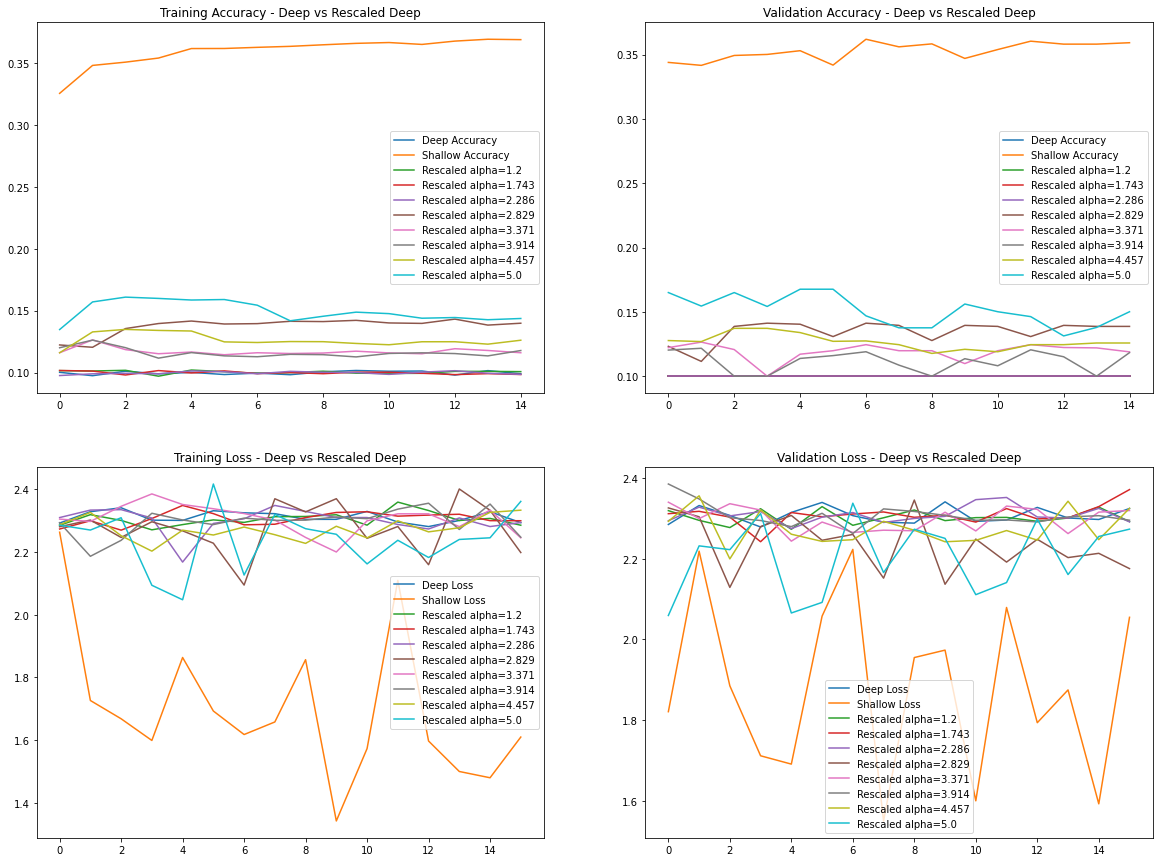

In [21]:
#L2
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Deep vs Rescaled Deep")
ax[0,0].plot(np.arange(len(accuracy_history)), accuracy_history, label='Deep Accuracy')
ax[0,0].plot(np.arange(len(accuracy_history2)), accuracy_history2, label='Shallow Accuracy')  
i=0
for a in alphas:
    ax[0,0].plot(np.arange(len(accuracy_history_alpha[i])), accuracy_history_alpha[i], label='Rescaled alpha='+str(round(a, 3))) 
    i+=1
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Deep vs Rescaled Deep")
ax[0,1].plot(np.arange(len(val_accuracy_history)), val_accuracy_history, label='Deep Accuracy')
ax[0,1].plot(np.arange(len(val_accuracy_history2)), val_accuracy_history2, label='Shallow Accuracy') 
i=0
for a in alphas:
    ax[0,1].plot(np.arange(len(val_accuracy_history_alpha[i])), val_accuracy_history_alpha[i], label='Rescaled alpha='+str(round(a, 3))) 
    i+=1
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Deep vs Rescaled Deep")
ax[1,0].plot(np.arange(len(loss_history)), loss_history, label='Deep Loss')
ax[1,0].plot(np.arange(len(loss_history)), loss_history2, label='Shallow Loss')  
i=0
for a in alphas:
    ax[1,0].plot(np.arange(len(loss_history_alpha[i])), loss_history_alpha[i], label='Rescaled alpha='+str(round(a, 3))) 
    i+=1
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Deep vs Rescaled Deep")
ax[1,1].plot(np.arange(len(val_loss_history)), val_loss_history, label='Deep Loss')
ax[1,1].plot(np.arange(len(val_loss_history)), val_loss_history2, label='Shallow Loss')
i=0
for a in alphas:
    ax[1,1].plot(np.arange(len(val_loss_history_alpha[i])), val_loss_history_alpha[i], label='Rescaled alpha='+str(round(a, 3))) 
    i+=1
ax[1,1].legend()

plt.show()

# 2 - CNN Many Layers Regime

### 1.1 - Deep vs. Shallow Comparison (20 hidden vs 1 hidden)

Configuration:

* **Deep CNN vs. Non-deep CNN:** to check that the many layers is indipendent of how large the parameters are.
     
  * (20, 8) --> Many-Layers Regime
  * (1, 8) --> Non Many-Layers Regime


* **Activation Functions:** $tanh$


* **Initialization:** $N(\omega, \mu = 0, \sigma^2 = 0.05)$ --> Not-Large Parameters Regime 



* **Loss:** Sparse Categorical Cross-Entropy


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Many Layers Regime.


**Results:** 



In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_CNNnet(input_shape=input_shape, activation = 'tanh',
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,0.05,seed=1),
                  #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer', 
                  n_hidden=20, 
                  units = 8,
                  regularization_type='l2', 
                  regularization_value=r)

cnn_grad_history, cnn_loss_history, cnn_accuracy_history, cnn_val_loss_history, cnn_val_accuracy_history, cnn_time = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model2 = models.make_CNNnet(input_shape=input_shape, activation = 'tanh',
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,0.05,seed=1),
#                   initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer', 
                  n_hidden=1, 
                  units =8,
                  regularization_type='l2', 
                  regularization_value=r)

cnn_grad_history2, cnn_loss_history2, cnn_accuracy_history2, cnn_val_loss_history2, cnn_val_accuracy_history2, cnn_time2 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model2, epochs, optimizer, loss, metric, batch_size)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Deep vs Shallow")
ax[0,0].plot(np.arange(len(cnn_accuracy_history)), cnn_accuracy_history, label='Deep Accuracy')
ax[0,0].plot(np.arange(len(cnn_accuracy_history)), cnn_accuracy_history2, label='Shallow Accuracy')  
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Deep vs Shallow")
ax[0,1].plot(np.arange(len(cnn_val_accuracy_history)), cnn_val_accuracy_history, label='Deep Accuracy')
ax[0,1].plot(np.arange(len(cnn_val_accuracy_history)), cnn_val_accuracy_history2, label='Shallow Accuracy')  
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Deep vs Shallow")
ax[1,0].plot(np.arange(len(cnn_loss_history)), cnn_loss_history, label='Deep Loss')
ax[1,0].plot(np.arange(len(cnn_loss_history)), cnn_loss_history2, label='Shallow Loss')  
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Deep vs Shallow")
ax[1,1].plot(np.arange(len(cnn_val_loss_history)), cnn_val_loss_history, label='Deep Loss')
ax[1,1].plot(np.arange(len(cnn_val_loss_history)), cnn_val_loss_history2, label='Shallow Loss')  
ax[1,1].legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey = "row")
    
ax[0,0].set_title("Mean gradient - Deep")
for key in cnn_grad_history[0]:
    ax[0,0].plot(range(len(cnn_grad_history)), [w[key].mean() for w in cnn_grad_history], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Deep")
for key in cnn_grad_history[0]:
    ax[1,0].semilogy(range(len(cnn_grad_history)), [w[key].std() for w in cnn_grad_history], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - Shallow")
for key in cnn_grad_history2[0]:
    ax[0,1].plot(range(len(cnn_grad_history2)), [w[key].mean() for w in cnn_grad_history2], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - Shallow")
for key in cnn_grad_history2[0]:
    ax[1,1].semilogy(range(len(cnn_grad_history2)), [w[key].std() for w in cnn_grad_history2], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(cnn_grad_history, deep=True)
visualization.plot_gradient_first_last(cnn_grad_history2)

### 2.2 - Adding the Scaled Activation Function

Configuration:

* **Deep CNN:** (20 hidden, 8 neurons)


* **Activation Functions:** $\alpha \tanh(z/\alpha)$


* **Initialization:** 

    * $N(\omega, \mu = 0, \sigma^2 = 0.05)$ --> Large Parameters Regime


* **Loss:** Sparse Categorical Cross-Entropy


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Large Parameters Regime.

* **Regularization:** NULL

**Results:** 





In [ ]:
# Model input shape
input_shape = (32, 32, 3)

def scaled_tanh(x, alpha):
    tanh = tf.keras.activations.tanh(x/alpha)
    return alpha*tanh

#Hyperparameters
epochs = 15
r = 0.0
alpha = 2
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()
scaled_activation = lambda x: scaled_tanh(x, alpha=alpha)


model = models.make_CNNnet(input_shape=input_shape, activation = scaled_activation,
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,0.05,seed=1),
                  #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer', 
                  n_hidden=20, 
                  units = 8,
                  regularization_type='l2', 
                  regularization_value=r)

cnn_grad_history3, cnn_loss_history3, cnn_accuracy_history3, cnn_val_loss_history3, cnn_val_accuracy_history3, cnn_time3 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)


In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Deep vs Shallow")
ax[0,0].plot(np.arange(len(cnn_accuracy_history)), cnn_accuracy_history, label='Deep Accuracy')
ax[0,0].plot(np.arange(len(cnn_accuracy_history)), cnn_accuracy_history2, label='Shallow Accuracy')
ax[0,0].plot(np.arange(len(cnn_accuracy_history3)), cnn_accuracy_history3, label='Deep-Scaled Accuracy') 
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Deep vs Shallow")
ax[0,1].plot(np.arange(len(cnn_val_accuracy_history)), cnn_val_accuracy_history, label='Deep Accuracy')
ax[0,1].plot(np.arange(len(cnn_val_accuracy_history)), cnn_val_accuracy_history2, label='Shallow Accuracy')  
ax[0,1].plot(np.arange(len(cnn_val_accuracy_history3)), cnn_val_accuracy_history3, label='Deep-Scaled Accuracy')
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Deep vs Shallow")
ax[1,0].plot(np.arange(len(cnn_loss_history)), cnn_loss_history, label='Deep Loss')
ax[1,0].plot(np.arange(len(cnn_loss_history2)), cnn_loss_history2, label='Shallow Loss')  
ax[1,0].plot(np.arange(len(cnn_loss_history3)), cnn_loss_history3, label='Deep-Scaled Loss')
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Deep vs Shallow")
ax[1,1].plot(np.arange(len(cnn_val_loss_history)), cnn_val_loss_history, label='Deep Loss')
ax[1,1].plot(np.arange(len(cnn_val_loss_history)), cnn_val_loss_history2, label='Shallow Loss')  
ax[1,1].plot(np.arange(len(cnn_val_loss_history3)), cnn_val_loss_history3, label='Deep-Scaled Loss')
ax[1,1].legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey = "row")
    
ax[0,0].set_title("Mean gradient - Deep")
for key in cnn_grad_history[0]:
    ax[0,0].plot(range(len(cnn_grad_history)), [w[key].mean() for w in cnn_grad_history], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Deep")
for key in cnn_grad_history[0]:
    ax[1,0].semilogy(range(len(cnn_grad_history)), [w[key].std() for w in cnn_grad_history], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - Rescaled Deep")
for key in cnn_grad_history3[0]:
    ax[0,1].plot(range(len(cnn_grad_history3)), [w[key].mean() for w in cnn_grad_history3], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - Rescaled Deep")
for key in cnn_grad_history3[0]:
    ax[1,1].semilogy(range(len(cnn_grad_history3)), [w[key].std() for w in cnn_grad_history3], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(cnn_grad_history, deep=True)
visualization.plot_gradient_first_last(cnn_grad_history3)

# 3 - Paper Model Many Layers Regime

### 3.1 - Deep vs. Shallow Comparison (20 hidden vs 1 hidden)

Configuration:

* **Paper/Small CNN** to check that the many layers is indipendent of how large the parameters are.
     

* **Activation Functions:** $tanh$


* **Initialization:** $N(\omega, \mu = 0, \sigma^2 = 0.05)$ --> Not-Large Parameters Regime 



* **Loss:** Sparse Categorical Cross-Entropy


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Many Layers Regime.


Comparing to see if the Many_layers Regime makes it more difficult to train the model. In fact, it does. The Learning Algorithm is completely stuck and is not able to advance in learning. Indeed, the mean gradient goes to zero really fast, after 1 epoch, in almost all layers, and the standard deviation is really small for all layers beyond the last two, meaning that almost all gradients in deep layers are practically zero.



In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.paper_net(input_shape=input_shape, issue = 'layers',
                  activation = 'tanh',
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,0.05,seed=1),
                  #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer',
                  regularization_type='l2', 
                  regularization_value=r)

pap_grad_history, pap_loss_history, pap_accuracy_history, pap_val_loss_history, pap_val_accuracy_history, pap_time = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()

model2 = models.make_CNNnet(input_shape=input_shape, activation = 'tanh',
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,0.05,seed=1),
#                   initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer', 
                  n_hidden=1, 
                  units =8,
                  regularization_type='l2', 
                  regularization_value=r)

pap_grad_history2, pap_loss_history2, pap_accuracy_history2, pap_val_loss_history2, pap_val_accuracy_history2, pap_time2 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model2, epochs, optimizer, loss, metric, batch_size)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Deep vs Shallow")
ax[0,0].plot(np.arange(len(pap_accuracy_history)), pap_accuracy_history, label='Deep Accuracy')
ax[0,0].plot(np.arange(len(pap_accuracy_history)), pap_accuracy_history2, label='Shallow Accuracy')  
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Deep vs Shallow")
ax[0,1].plot(np.arange(len(pap_val_accuracy_history)), pap_val_accuracy_history, label='Deep Accuracy')
ax[0,1].plot(np.arange(len(pap_val_accuracy_history)), pap_val_accuracy_history2, label='Shallow Accuracy')  
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Deep vs Shallow")
ax[1,0].plot(np.arange(len(pap_loss_history)), pap_loss_history, label='Deep Loss')
ax[1,0].plot(np.arange(len(pap_loss_history)), pap_loss_history2, label='Shallow Loss')  
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Deep vs Shallow")
ax[1,1].plot(np.arange(len(pap_val_loss_history)), pap_val_loss_history, label='Deep Loss')
ax[1,1].plot(np.arange(len(pap_val_loss_history)), pap_val_loss_history2, label='Shallow Loss')  
ax[1,1].legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey = "row")
    
ax[0,0].set_title("Mean gradient - Deep")
for key in pap_grad_history[0]:
    ax[0,0].plot(range(len(pap_grad_history)), [w[key].mean() for w in pap_grad_history], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Deep")
for key in pap_grad_history[0]:
    ax[1,0].semilogy(range(len(pap_grad_history)), [w[key].std() for w in pap_grad_history], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - Shallow")
for key in pap_grad_history2[0]:
    ax[0,1].plot(range(len(pap_grad_history2)), [w[key].mean() for w in pap_grad_history2], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - Shallow")
for key in pap_grad_history2[0]:
    ax[1,1].semilogy(range(len(pap_grad_history2)), [w[key].std() for w in pap_grad_history2], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(pap_grad_history, paper=True, deep=True)
visualization.plot_gradient_first_last(pap_grad_history2, paper=True)

### 3.2 - Adding the Scaled Activation Function

Configuration:

* **Paper CNN:** to check that the large parameters is indipendent of how many layers the network has. 


* **Activation Functions:** $\alpha \tanh(z/\alpha)$


* **Initialization:** 

    * $N(\omega, \mu = 0, \sigma^2 = 0.05)$ --> Large Parameters Regime


* **Loss:** Sparse Categorical Cross-Entropy


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Large Parameters Regime.

* **Regularization:** NULL

**Results:** 





In [ ]:
# Model input shape
input_shape = (32, 32, 3)

def scaled_tanh(x, alpha):
    tanh = tf.keras.activations.tanh(x/alpha)
    return alpha*tanh

#Hyperparameters
epochs = 15
r = 0.0
alpha = 2
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()
scaled_activation = lambda x: scaled_tanh(x, alpha=alpha)


model = models.paper_net(input_shape=input_shape, issue = 'layers',
                  activation = scaled_activation,
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,0.05,seed=1),
                  #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer',
                  regularization_type='l2', 
                  regularization_value=r)

pap_grad_history3, pap_loss_history3, pap_accuracy_history3, pap_val_loss_history3, pap_val_accuracy_history3, pap_time3 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)


In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Deep vs Shallow")
ax[0,0].plot(np.arange(len(pap_accuracy_history)), pap_accuracy_history, label='Deep Accuracy')
ax[0,0].plot(np.arange(len(pap_accuracy_history)), pap_accuracy_history2, label='Shallow Accuracy')
ax[0,0].plot(np.arange(len(pap_accuracy_history3)), pap_accuracy_history3, label='Deep-Scaled Accuracy') 
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Deep vs Shallow")
ax[0,1].plot(np.arange(len(pap_val_accuracy_history)), pap_val_accuracy_history, label='Deep Accuracy')
ax[0,1].plot(np.arange(len(pap_val_accuracy_history)), pap_val_accuracy_history2, label='Shallow Accuracy')  
ax[0,1].plot(np.arange(len(pap_val_accuracy_history3)), pap_val_accuracy_history3, label='Deep-Scaled Accuracy')
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Deep vs Shallow")
ax[1,0].plot(np.arange(len(pap_loss_history)), pap_loss_history, label='Deep Loss')
ax[1,0].plot(np.arange(len(pap_loss_history2)), pap_loss_history2, label='Shallow Loss')  
ax[1,0].plot(np.arange(len(pap_loss_history3)), pap_loss_history3, label='Deep-Scaled Loss')
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Deep vs Shallow")
ax[1,1].plot(np.arange(len(pap_val_loss_history)), pap_val_loss_history, label='Deep Loss')
ax[1,1].plot(np.arange(len(pap_val_loss_history)), pap_val_loss_history2, label='Shallow Loss')  
ax[1,1].plot(np.arange(len(pap_val_loss_history3)), pap_val_loss_history3, label='Deep-Scaled Loss')
ax[1,1].legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey = "row")
    
ax[0,0].set_title("Mean gradient - Deep")
for key in pap_grad_history[0]:
    ax[0,0].plot(range(len(pap_grad_history)), [w[key].mean() for w in pap_grad_history], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Deep")
for key in pap_grad_history[0]:
    ax[1,0].semilogy(range(len(pap_grad_history)), [w[key].std() for w in pap_grad_history], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - Rescaled Deep")
for key in pap_grad_history3[0]:
    ax[0,1].plot(range(len(pap_grad_history3)), [w[key].mean() for w in pap_grad_history3], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - Rescaled Deep")
for key in pap_grad_history3[0]:
    ax[1,1].semilogy(range(len(pap_grad_history3)), [w[key].std() for w in pap_grad_history3], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(pap_grad_history, paper=True)
visualization.plot_gradient_first_last(pap_grad_history3, paper=True)

### 3.3 - Finding the best $\alpha$ Rescaling Parameter

Since Rescaling seems not to be working with the current values of $\alpha$, let's see for which value it performs best and see whether there is, actually, a rescaling regime in which the vanishing gradient issue is fixed.

In [ ]:
# Model input shape
input_shape = (32, 32, 3)

def scaled_tanh(x, alpha):
    tanh = tf.keras.activations.tanh(x/alpha)
    return alpha*tanh

#Hyperparameters
epochs = 15
r = 0.00
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()

pap_grad_history_alpha = []
pap_loss_history_alpha =  [] 
pap_accuracy_history_alpha = [] 
pap_val_loss_history_alpha = [] 
pap_val_accuracy_history_alpha = [] 

In [ ]:
alphas = np.linspace(1.2, 5, 8)
print('--- Initializing Regularization Loop ---')
index = 0
for a in alphas:
    from time import time
    print('alpha = ', a, '------- #',index+1 , 'of', len(alphas))
    scaled_activation = lambda x: scaled_tanh(x, alpha=a)
    model = models.paper_net(input_shape=input_shape, issue = 'layers',
                  activation = scaled_activation,
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,0.05,seed=1),
                  #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer',
                  regularization_type='l2', 
                  regularization_value=r)

    
    grad, train_loss, train_accuracy, val_loss, val_accuracy, time = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)
    pap_grad_history_alpha.append(grad)
    pap_loss_history_alpha.append(train_loss)
    pap_accuracy_history_alpha.append(train_accuracy)
    pap_val_loss_history_alpha.append(val_loss) 
    pap_val_accuracy_history_alpha.append(val_accuracy)

In [ ]:
#L2
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Deep vs Rescaled Deep")
ax[0,0].plot(np.arange(len(pap_accuracy_history)), pap_accuracy_history, label='Deep Accuracy')
ax[0,0].plot(np.arange(len(pap_accuracy_history2)), pap_accuracy_history2, label='Shallow Accuracy')  
i=0
for a in alphas:
    ax[0,0].plot(np.arange(len(pap_accuracy_history_alpha[i])), pap_accuracy_history_alpha[i], label='Rescaled alpha='+str(round(a, 3))) 
    i+=1
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Deep vs Rescaled Deep")
ax[0,1].plot(np.arange(len(pap_val_accuracy_history)), pap_val_accuracy_history, label='Deep Accuracy')
ax[0,1].plot(np.arange(len(pap_val_accuracy_history2)), pap_val_accuracy_history2, label='Shallow Accuracy') 
i=0
for a in alphas:
    ax[0,1].plot(np.arange(len(pap_val_accuracy_history_alpha[i])), pap_val_accuracy_history_alpha[i], label='Rescaled alpha='+str(round(a, 3))) 
    i+=1
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Deep vs Rescaled Deep")
ax[1,0].plot(np.arange(len(pap_loss_history)), pap_loss_history, label='Deep Loss')
ax[1,0].plot(np.arange(len(pap_loss_history)), pap_loss_history2, label='Shallow Loss')  
i=0
for a in alphas:
    ax[1,0].plot(np.arange(len(pap_loss_history_alpha[i])), pap_loss_history_alpha[i], label='Rescaled alpha='+str(round(a, 3))) 
    i+=1
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Deep vs Rescaled Deep")
ax[1,1].plot(np.arange(len(pap_val_loss_history)), pap_val_loss_history, label='Deep Loss')
ax[1,1].plot(np.arange(len(pap_val_loss_history)), pap_val_loss_history2, label='Shallow Loss')
i=0
for a in alphas:
    ax[1,1].plot(np.arange(len(pap_val_loss_history_alpha[i])), pap_val_loss_history_alpha[i], label='Rescaled alpha='+str(round(a, 3))) 
    i+=1
ax[1,1].legend()

plt.show()